<a href="https://colab.research.google.com/github/JMandal02/Data-Science_pwskills/blob/main/Assignment__Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment:Boosting**

## **Question 1** : **What is Boosting in Machine Learning? Explain how it improves weak learners.**

**Answer:**  
Boosting is an ensemble learning technique that combines several weak learners (usually shallow decision trees) into a strong predictive model.  
It trains models sequentially so that each new model focuses on the mistakes made by the previous ones.

### How it improves weak learners
1. **Sequential correction:** Each model is trained on the residual errors of previous models.  
2. **Weighted samples:** Misclassified points get higher weights, forcing the model to learn difficult cases.  
3. **Aggregation:** Final prediction is a weighted combination of all models.  
4. **Bias-variance reduction:** Boosting lowers bias by learning complex patterns and lowers variance through averaging.

Common algorithms: AdaBoost, Gradient Boosting, XGBoost, CatBoost, LightGBM.

---

## **Question 2** : **What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

**Answer:**  

| Feature | AdaBoost | Gradient Boosting |
|:---------|:----------|:------------------|
| Main idea | Re-weights misclassified samples | Fits new models to residuals (gradients) |
| Training sequence | Updates sample weights | Minimizes loss via gradient descent |
| Error handling | Focuses on hard-to-classify data points | Uses residual errors as new targets |
| Model output | Weighted average of weak learners | Additive combination of learners |
| Typical base model | Decision stump | Decision tree (depth > 1) |
| Loss optimized | Exponential loss | Any differentiable loss (e.g., MSE, log-loss) |

AdaBoost adjusts **sample weights**; Gradient Boosting fits new learners to **loss gradients**.

---

## **Question 3 :** **How does regularization help in XGBoost?**

**Answer:**  
XGBoost adds explicit regularization terms to its objective to prevent overfitting and improve generalization.

### Types of regularization
1. **L1 (Lasso):** Shrinks less important weights to 0 → sparser models.  
2. **L2 (Ridge):** Penalizes large weights → smoother predictions.  
3. **Tree complexity penalty:** Adds cost for number of leaves and leaf weights.

### Benefits
- Avoids overly complex trees  
- Improves generalization  
- Speeds convergence by pruning  
- Makes model robust to noise and small datasets

---

## **Question 4 : Why is CatBoost considered efficient for handling categorical data?**

**Answer:**  
CatBoost (Categorical Boosting) is designed to handle categorical variables efficiently and automatically.

### Reasons for efficiency
1. **Built-in encoding:** Uses ordered target statistics instead of one-hot encoding.  
2. **Ordered boosting:** Prevents target leakage by computing statistics sequentially.  
3. **No manual preprocessing:** Works directly with categorical columns.  
4. **Hardware optimization:** Highly efficient GPU/CPU implementation.  
5. **Handles missing values** internally.

---

## **Question 5:  What are some real-world applications where boosting techniques are preferred over bagging methods?**

**Answer:**  
Boosting often yields higher accuracy than bagging (like Random Forest) for complex structured data.

### Examples
1. **Finance:** Credit-scoring, loan-default prediction.  
2. **Healthcare:** Disease-risk modeling.  
3. **Marketing:** Customer-churn prediction.  
4. **Cybersecurity:** Fraud or spam detection.  
5. **E-commerce:** Product recommendations and pricing.

Boosting reduces both bias and variance, performing well even on noisy or imbalanced datasets.

---


## **Question 6 : Write a Python program to:**  
- Train an AdaBoost Classifier on the Breast Cancer dataset  
- Print the model accuracy


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Accuracy: 0.9766081871345029


## **Question 7 : Write a Python program to:**  
- Train a Gradient Boosting Regressor on the California Housing dataset  
- Evaluate performance using R-squared score


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.8004451261281281


## **Question 8 : Write a Python program to:**  
- Train an XGBoost Classifier on the Breast Cancer dataset  
- Tune the learning rate using GridSearchCV  
- Print the best parameters and accuracy


In [8]:
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:01:54] WARNING: /w

Best Parameters: {'learning_rate': 0.05}
Accuracy: 0.9649122807017544


## **Question 9: Write a Python program to:**  
- Train a CatBoost Classifier  
- Plot the confusion matrix using seaborn


Accuracy: 0.9824561403508771


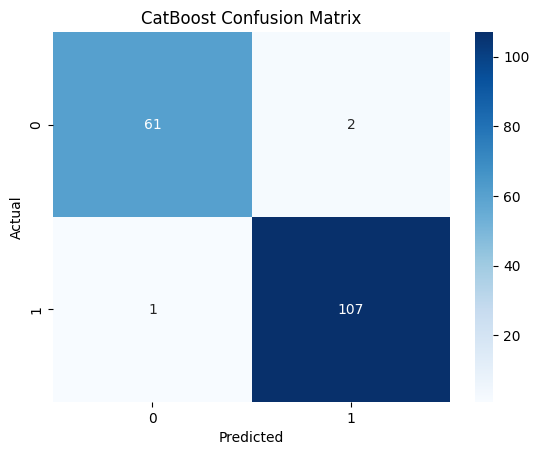

In [7]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cat = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=False)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **Question 10**  
**Scenario:**  
You’re working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.  
The dataset is imbalanced, contains missing values, and has both numeric and categorical features.  

**Describe your step-by-step data science pipeline using boosting techniques:**  
- Data preprocessing & handling missing/categorical values  
- Choice between AdaBoost, XGBoost, or CatBoost  
- Hyperparameter tuning strategy  
- Evaluation metrics you'd choose and why  
- How the business would benefit from your model
# Answer:

### **Step 1: Data Preprocessing**
- Handle missing values:
  - Numerical: Replace with median
  - Categorical: Replace with mode
- Handle categorical variables:
  - Use CatBoost, which can process categorical data directly.
- Scaling:
  - Not required for tree-based models (XGBoost, CatBoost, AdaBoost)

### *Step 2: Model Choice*
- Choose **CatBoost** because it:
  - Automatically handles categorical data and missing values.
  - Works well with imbalanced data.
  - Is efficient and less prone to overfitting.

### **Step 3: Hyperparameter Tuning**
- Use **GridSearchCV** or **Optuna** to tune parameters like:
  - learning_rate
  - depth
  - iterations
  - l2_leaf_reg

### **Step 4: Evaluation Metrics**
For imbalanced data:
- **AUC-ROC** → Measures classification performance across thresholds.
- **Precision, Recall, F1-score** → Capture imbalance correctly.
- **Confusion Matrix** → Helps visualize errors.

### **Step 5: Business Benefit**
- Helps identify risky borrowers early.
- Reduces financial losses due to loan defaults.
- Improves risk management and profitability.
- Enables more informed, data-driven lending decisions.

---

